# Part 1: MAP

#### 1. Generate 50 2D-data points using the following function: $y = sin(x^2 +1)$ 
#### 2. Add Gaussian random noise to the data
#### 3. Show the original curve line and the noisy data.

[0, 1, 0.75, 1.1]

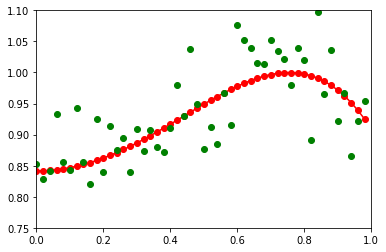

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# Define the sin function that returns the original data
def sin_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Define a function that adds noise to y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu, sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

# Set constant variables:
# sigma: the sigma value we use for the Gaussian distribution
sigma = 0.05
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, sigma)

# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
plt.plot(x, sin_distribution()[1], "ro")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])

#### 4. Fit the generated noisy data using the MAP as discussed in class.


Note that here we are using the formula $\overline{w}=(\bf{X}^T\bf{X} + \frac{\alpha}{\beta})^{-1} \bf{X}^T \bar{t}$. We define $\frac{\alpha}{\beta}$ as one constant, called $c$ in the code.

In [2]:
# Set even more constant variables
# alpha: the coefficient of the regularization/prior term
# beta: the noise level of the dataset
# We set c=alpha/beta and just vary c.


# Create NxM array, the matrix X, that takes in input M
def X(x,N,M):
    # Create matrix of powers of x:
    # this is done by repeating the vector (0,...,M-1) N times, giving us a NxM matrix
    powersMat = np.tile(np.arange(M),(N,1))
    # Create our X matrix by repeating the x vector M times,
    # then transposing it to get an NxM matrix.
    # Then take the powers according to powersMat elementwise.
    X = np.power(np.transpose(np.tile(x,(M,1))), powersMat)
    return(X)

# Create the MAP function that takes in X, M, N, t_bar, x, a = alpha, b = beta, and returns y_bar and w_bar
# It's the same as least squares, but we add in the 
# diagonal alpha/beta matrix of dimension NxN
def MAP(X,M,N,t_bar,x, c):
    # Create diagonal matrix with c=alpha/beta
    cMat = np.diag(np.full(M, c))
    # Calculate the pseudo inverse, but adding the alpha/beta matrix inside
    pseudo_inv = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)+cMat), np.transpose(X))
    # Calculate w_bar by multiplying the pseudo inverse with t_bar
    w_bar = np.dot(pseudo_inv,t_bar)
    # Create our vector x locally
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += w_bar[i]*np.power(x_local,i)
    return y_bar, w_bar

#### 5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [3]:
# Fix y_bar by using the least squares method for for M = 10, c = alpha/beta = 0.005
y_bar = MAP(X(x,N,10),10, N, t_bar,x, 0.005)[0]

# Find the error 
def Error(y_bar, t_bar):
    return 0.5*np.dot(np.transpose(y_bar - t_bar), (y_bar - t_bar))
print("Error for M = 10: " + str(round(Error(y_bar,t_bar), 3)))

Error for M = 10: 0.057


#### 6. Display the estimated values of w.

In [4]:
w_bar = MAP(X(x,N,10),10, N, t_bar,x, 0.005)[1]
for i,w in enumerate(reversed(w_bar)):
    print("w_" + str(i) + " = " + str(round(w, 3)))

w_0 = 0.203
w_1 = -0.03
w_2 = -0.202
w_3 = -0.277
w_4 = -0.221
w_5 = -0.021
w_6 = 0.25
w_7 = 0.319
w_8 = -0.007
w_9 = 0.86


#### 7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

Text(0.5,1,'M=10, alpha/beta = 0')

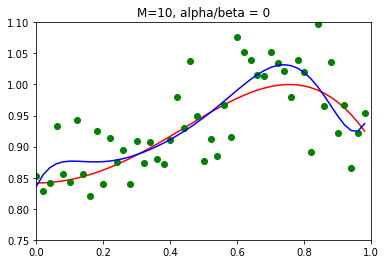

In [5]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,10),10,N, t_bar, x, 0)[0], "b")
plt.title('M=10, alpha/beta = 0')

Text(0.5,1,'M=10, alpha/beta = 0.1')

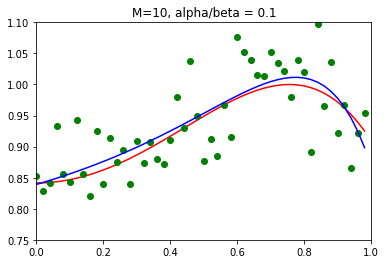

In [6]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,10),10,N, t_bar, x, 0.1)[0], "b")
plt.title('M=10, alpha/beta = 0.1')

Text(0.5,1,'M=10, alpha/beta = 2')

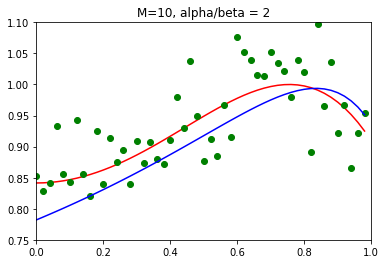

In [7]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,10),10,N, t_bar, x, 2)[0], "b")
plt.title('M=10, alpha/beta = 2')

Text(0.5,1,'M=3, alpha/beta = 0')

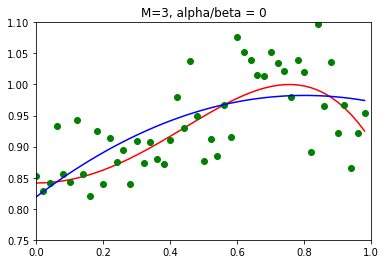

In [8]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,3),3,N, t_bar, x, 0)[0], "b")
plt.title('M=3, alpha/beta = 0')

Text(0.5,1,'M=3, alpha/beta = 0.1')

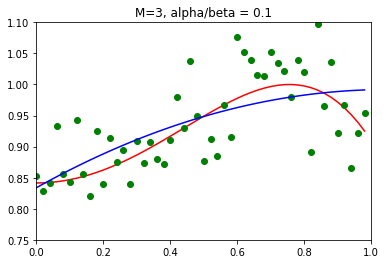

In [9]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,3),3,N, t_bar, x, 0.1)[0], "b")
plt.title('M=3, alpha/beta = 0.1')

Text(0.5,1,'M=3, alpha/beta = 2')

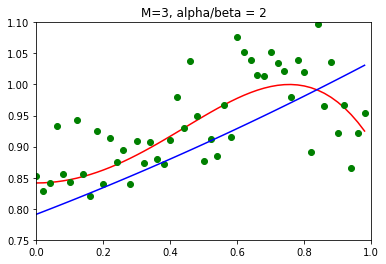

In [10]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
plt.plot(x, MAP(X(x,N,3),3,N, t_bar, x, 2)[0], "b")
plt.title('M=3, alpha/beta = 2')

Text(0.5,1,'M=3, alpha/beta = 1000000')

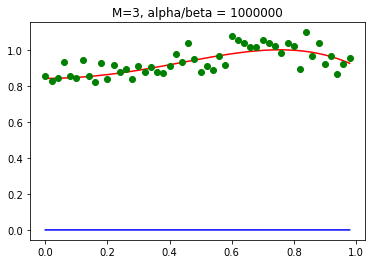

In [11]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.plot(x, MAP(X(x,N,3),3,N, t_bar, x, 1000000)[0], "b")
plt.title('M=3, alpha/beta = 1000000')

Text(0.5,1,'M=10, alpha/beta = 1000000')

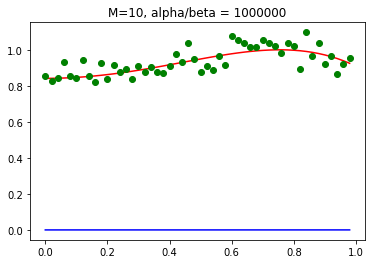

In [12]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.plot(x, MAP(X(x,N,10),10,N, t_bar, x, 1000000)[0], "b")
plt.title('M=10, alpha/beta = 1000000')

#### 8. From the experiment in 7, discuss how M and alpha influence on the fitting accuracy.


As with MLE, we find that for a high value of M, overfitting occurs, and for a lower M, underfitting occurs. We now examine what happens when we change $\frac{\alpha}{\beta}$.

In general, as $|\frac{\alpha}{\beta}| \rightarrow 0$, the closer the curve is to the original MLE curve (using least squares). This is because if $|\frac{\alpha}{\beta}|=0$, our algorithm would be exactly the same as least squares.

For $|\frac{\alpha}{\beta}| \rightarrow \infty$, the curve of the model changes dramatically and tends to a constant, particularly once when $|\frac{\alpha}{\beta}|>1$. This is because the terms in the matrix $\bf{X}$ are mostly between $1$ and $0$, since $0 < x_n, t_n < 1$. Adding a constant to the matrix $\bf{X}$ that is too large dramatically skews it to become effectively a constant matrix. This affects our least squares calculation and gives us a very bad result for $\overline{w}$.

For a small $|\frac{\alpha}{\beta}|$ (in the above question, $\frac{\alpha}{\beta} = 0.1$), the curve of the model is "smoothened out". Higher-order terms in our polynomial model are penalised appropriately with an effective choice of the constant used, and overfitting is reduced by reducing the overall model complexity. Since the original curve is already underfit for small $M$, however, changing $\frac{\alpha}{\beta}$ does not help much since it reduces the model complexity even more.

Overall, the best result is obtained when we have a large $M$ and an appropriate value of $\frac{\alpha}{\beta}$ that is not too small and not too large. 


# Part 1: Basis Functions

#### Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below:



#### 1. Generate 50 2D-data points using the following function: $y = sin(x^2 +1)$.
#### 2. Add Gaussian random noise to the data.

In [13]:
# Define the sin function that returns the original data
def sin_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Define a function that adds noise to y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu, sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

#### 3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

In [14]:
# Set constant variables:
# x: the NX1 vector of original x-values
x = sin_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = sin_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(y, 0, 0.04)

# Generate our Mx1 array of mu values based on M
def mu(M,x_):
    return np.arange(x_[0], x_[N-1], (x_[N-1]-x_[0])/M)

def gaussian_m(x_n, m, s,M):
    # returns phi_m(x_n) for a particular input x_n and a particular m
    diffSq = np.power(x_n - mu(M,x_n)[m], 2)
    return np.exp((-diffSq)/(2*s))

# Create NxM array of big Phi (defined by gaussian basis)
def PhiMat_Gaussian(x,N, M, s):
    # s = (x[N-1]-x[0])/M
    result = np.zeros(N)
    # For each row, take gaussian_m of that row
    for i in range(M):
        newrow = gaussian_m(x,i,s,M)
        result = np.vstack([result, newrow])
    result = np.delete(result, 0, 0)
    return(np.transpose(result))


def gaussian_basis(X,M,N,t_bar,x,s):
    # Calculate the pseudo inverse
    pseudo_inv = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)) , np.transpose(X))
    # Calculate w_bar by multiplying the pseudo inverse with t_bar
    w_bar = np.dot(pseudo_inv,t_bar)
    # Create our vector x locally
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += w_bar[i]*gaussian_m(x_local,i,s,M)
    return y_bar, w_bar

#### 4. Show your results for different values of M that generate overfitting and underfitting curves.


In [2]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
# plt.axis([0,1,0.75,1.1])
# Estimated curve with M = 15 - Overfitting
# Set sigma s as the range of x divided by M = 50
s = (((x[N-1]-x[0])/50)*1.5)**2
print(s)
plt.plot(x, gaussian_basis(PhiMat_Gaussian(x,N, 50, s),50,N, t_bar,x, s)[0], "b")
print(gaussian_basis(PhiMat_Gaussian(x,N, 50, s),50,N, t_bar,x, s)[0])
plt.title('Overfitting: M=50, s = 0.001, Gaussian Basis')

NameError: name 'plt' is not defined

0.540225


Text(0.5,1,'Underfitting: M=2, s = 0.54, Gaussian Basis')

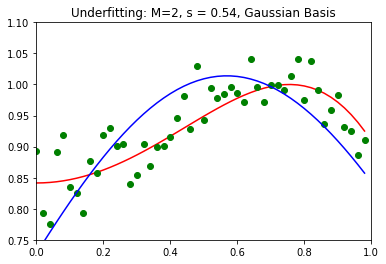

In [16]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
# Estimated curve with M = 2 - underfitting
s = (((x[N-1]-x[0])/2)*1.5)**2
print(s)
plt.plot(x, gaussian_basis(PhiMat_Gaussian(x,N, 2, s), 2,N, t_bar,x, s)[0], "b")
plt.title('Underfitting: M=2, s = 0.54, Gaussian Basis')

Text(0.5,1,'Nice Fitting: M=4, s = 0.5, Gaussian Basis')

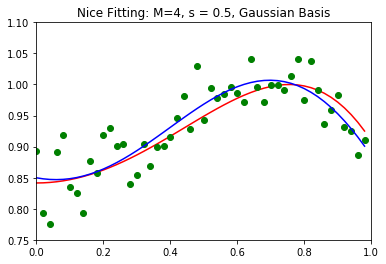

In [31]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
# Estimated curve with M = 2 - underfitting
plt.plot(x, gaussian_basis(PhiMat_Gaussian(x,N, 4, 0.5), 4,N, t_bar,x, 0.5)[0], "b")
plt.title('Nice Fitting: M=4, s = 0.5, Gaussian Basis')

#### 5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

In [17]:
def sigmoid_m(x_n, m, s,M):
    # returns phi_m(x_n) for a particular input x_n and a particular m
    num = (x_n - mu(M,x_n)[m])/s
    result = 1/(1+np.exp(-num))
    return result

# Create NxM array of big Phi (defined by gaussian basis)
def PhiMat_Sigmoid(x,N, M, s):
    result = np.zeros(N)
    # For each row, take gaussian_m of that row
    for i in range(M):
        newrow = sigmoid_m(x,i,s,M)
        result = np.vstack([result, newrow])
    result = np.delete(result, 0, 0)
    return(np.transpose(result))


def sigmoid_basis(X,M,N,t_bar,x,s):
    # Calculate the pseudo inverse
    pseudo_inv = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)) , np.transpose(X))
    # Calculate w_bar by multiplying the pseudo inverse with t_bar
    w_bar = np.dot(pseudo_inv,t_bar)
    # Create our vector x locally
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += w_bar[i]*sigmoid_m(x_local,i,s,M)
    return y_bar, w_bar

0.0008643599999999999


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Text(0.5,1,'Overfitting: M=50, s = 0.0008, Sigmoid Basis')

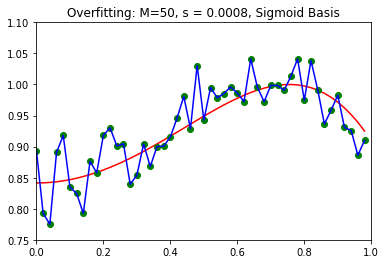

In [18]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
s = (((x[N-1]-x[0])/50)*1.5)**2
# Estimated curve with M = 50 - Overfitting
plt.plot(x, sigmoid_basis(PhiMat_Sigmoid(x,N, 50, s),50,N, t_bar,x, s)[0], "b")
print(s)
plt.title('Overfitting: M=50, s = 0.0008, Sigmoid Basis')

0.540225


Text(0.5,1,'Underfitting: M=2, s = 0.54, Sigmoid Basis')

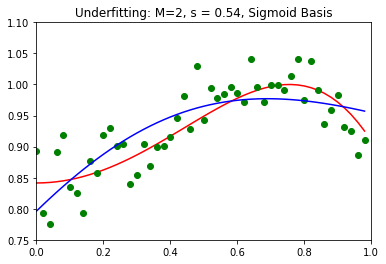

In [19]:
# Actual curve plotted in red line
plt.plot(x, sin_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,1,0.75,1.1])
s = (((x[N-1]-x[0])/2)*1.5)**2
# Estimated curve with M = 2 - underfitting
plt.plot(x, sigmoid_basis(PhiMat_Sigmoid(x,N, 2, s), 2,N, t_bar,x,s)[0], "b")
print(s)
plt.title('Underfitting: M=2, s = 0.54, Sigmoid Basis')

#### 6. Change the original curve function to $y = 0.4345x^3 -5.607x^2 +16.78x -10.61$, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

Text(0.5,1,'Best Fit: M=4, s = 4, Sigmoid Basis')

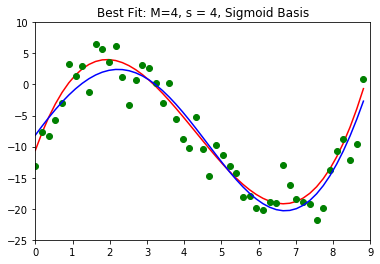

In [20]:
# Define a function that returns our original function points
def new_distribution():
    # create x coordinates in interval [0,9), with increment 0.2
    x = np.arange(0,9,0.18);
    # create y coordinates according to given function
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x,y

x_new = new_distribution()[0]
N_new = len(x_new)
y_new = new_distribution()[1]
t_bar_new = add_noise(y_new, 0, 3)

# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
plt.axis([0,9,-25,10])

plt.plot(x_new, sigmoid_basis(PhiMat_Sigmoid(x_new,N_new, 4, 4), 
                              4,N_new, t_bar_new, x_new, 4)[0], "b")
plt.title('Best Fit: M=4, s = 4, Sigmoid Basis')

#### 7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

Text(0.5,1,'Overfitting: M=50, s = 0.2, Sigmoid Basis')

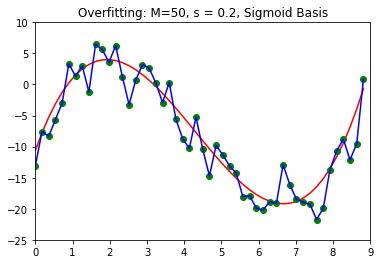

In [21]:
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
plt.axis([0,9,-25,10])

plt.plot(x_new, sigmoid_basis(PhiMat_Sigmoid(x_new,N_new, 50, 0.2), 
                              50,N_new, t_bar_new, x_new, 0.2)[0], "b")
plt.title('Overfitting: M=50, s = 0.2, Sigmoid Basis')

Text(0.5,1,'Underfitting: M=3, s = 0.2, Sigmoid Basis')

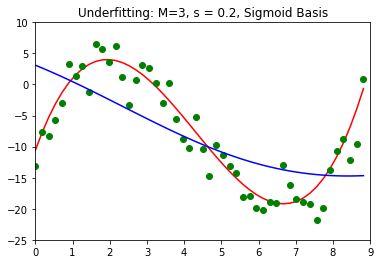

In [22]:
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
plt.axis([0,9,-25,10])

plt.plot(x_new, sigmoid_basis(PhiMat_Sigmoid(x_new,N_new, 3, 5), 
                              3,N_new, t_bar_new, x_new, 5)[0], "b")
plt.title('Underfitting: M=3, s = 0.2, Sigmoid Basis')

Text(0.5,1,'M=40, s = 1000000')

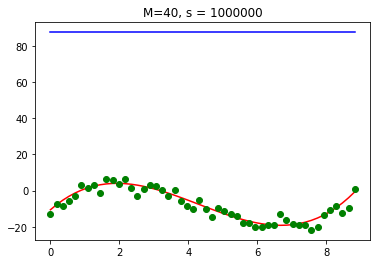

In [23]:
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
# plt.axis([0,9,-25,10])

plt.plot(x_new, sigmoid_basis(PhiMat_Sigmoid(x_new,N_new, 40, 1000000), 
                              40,N_new, t_bar_new, x_new, 1000000)[0], "b")
plt.title('M=40, s = 1000000')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Text(0.5,1,'M=20, s = 0.00000001')

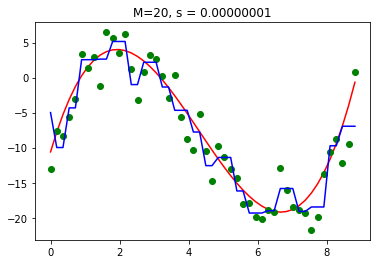

In [29]:
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
# plt.axis([0,9,-25,10])

plt.plot(x_new, sigmoid_basis(PhiMat_Sigmoid(x_new,N_new, 20, 0.001), 
                              20,N_new, t_bar_new, x_new, 0.001)[0], "b")
plt.title('M=20, s = 0.00000001')

Text(0.5,1,'M=20, s = 0.001')

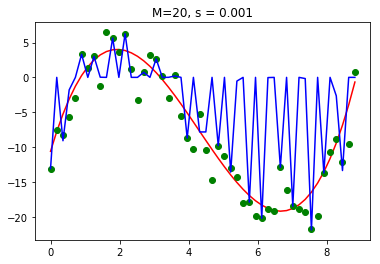

In [25]:
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
# plt.axis([0,9,-25,10])

plt.plot(x_new, gaussian_basis(PhiMat_Gaussian(x_new,N_new, 20, 0.001), 
                              20,N_new, t_bar_new, x_new, 0.001)[0], "b")
plt.title('M=20, s = 0.001')

In general, using basis functions does not solve our model selection problem. From the graphs above, the overfitting and underfitting problem still persists for high and low M respectively.

The main advantage of using basis functions is that it can handle multidimensional data, which polynomial functions cannot. Using basis functions is also more numerically stable compared to polynomials of larger degrees. It is more difficult to fit a polynomial function to multiple points of data as opposed to basis functions.

A second advantage of using basis functions is that it can be more expressive compared to the polynomial function depending on the M chosen - for example, a polynomial function of degree M would have M turning points, but a sum of M gaussian basis functions can have 2M turning points (M local maxima and M local minima).

Another advantage of using basis functions in general is that we can vary the kind of basis function we want to use to suit the kind of data we want to model. For example, the gaussian function gives us a very spiky/mountain-looking curve since it is the sum of multiple gaussian distributions, whereas the sigmoid function gives a very blocky, discrete curve that looks almost like an interval step function. In some cases, we might want that property in our model (e.g in modelling signals from machines).

Compared to the polynomial function, however, the gaussian basis function is more expensive to call since the computation is more complex. It also depends heavily on the value of s chosen to give the desired result, since s determines the amount of overlap between each gaussian basis function, which depends on the basis function we choose. So given a situation where the data model seems like it can easily fit a polynomial model, I would still use the polynomial model - but given a more complex model, basis functions might be more appropriate.